# SVM

## Lab Assignment - Glass Classification

Classify glass based on features like RI(Refractive Index) and amount of several chemical elements using SVM Classifier model.

Perform classification with the following functions.

#### 1. Drop the columns which are not essential. Plot the scatter of all feature columns vs glass. Use different colours for different glass classes. Give appropriate legends. 
#### 2. Obtain the correlation matrix to prove the correlation between  all feature columns. On the basis of these values, drop columns which are not required.
#### 3. Split the data set into training and testing data set. Use the train_test_split function to get a 80:20 split, using random_state 3.
#### 4. Use the SVM Classifier model to classify the data, and get predictions for test dataset.
#### 5. Obtain the confusion matrix of the output.
#### 7. Get the classification result for the following values respectively. 

### Perform KFold cross validation for k=3 to 6 for this dataset.

In [41]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

cols = ['id', 'ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass']
x_cols = cols[1:-1]
df = pd.read_csv('glass.data.csv', header=None, names=cols)
cols = cols[1:]
df = df.drop(['id'], axis=1)
df.head()

,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#  Q1 Drop the columns which are not essential. Plot the scatter of all feature columns vs glass. Use different colours for different glass classes. Give appropriate legends.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


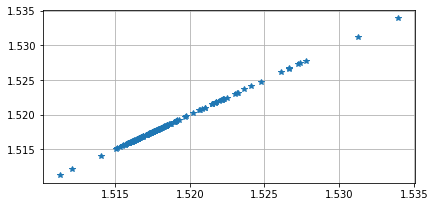

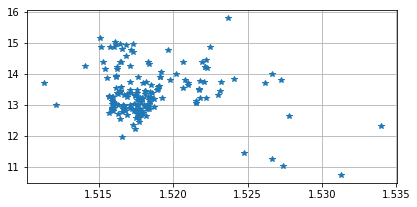

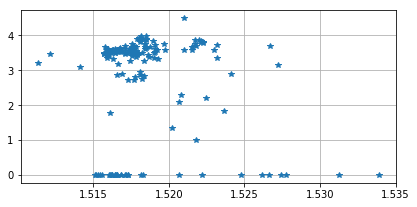

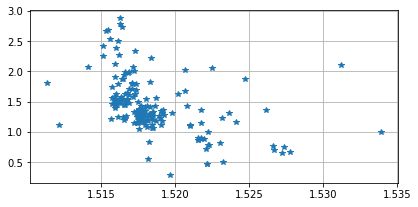

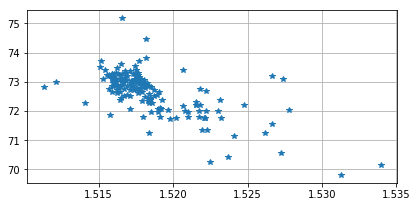

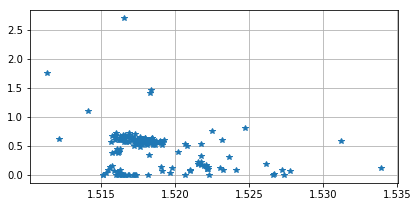

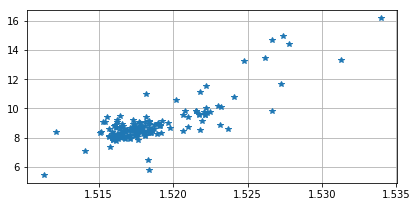

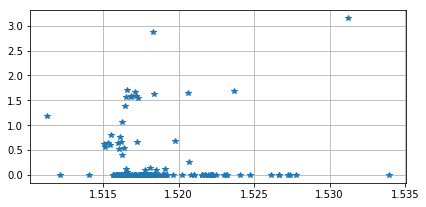

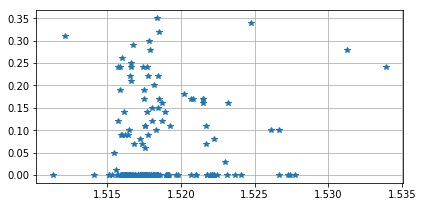

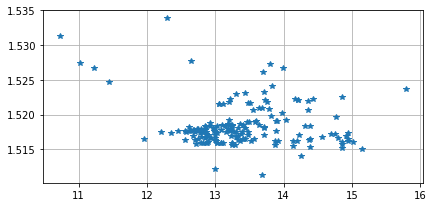

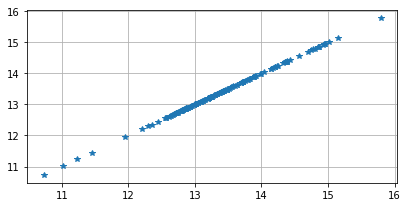

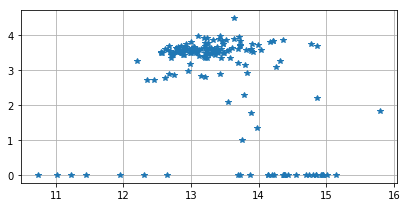

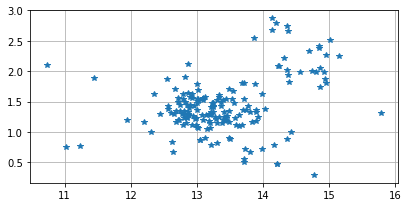

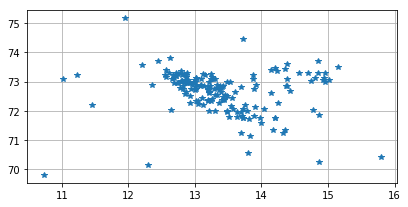

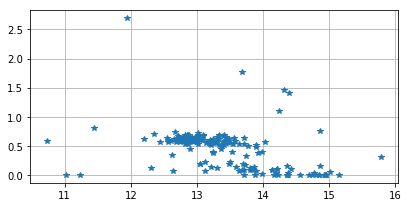

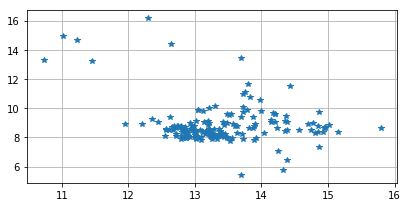

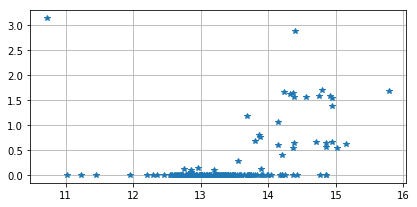

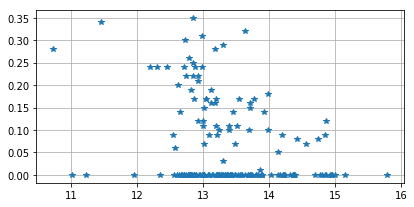

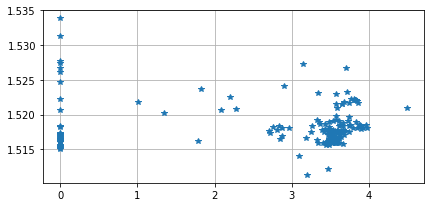

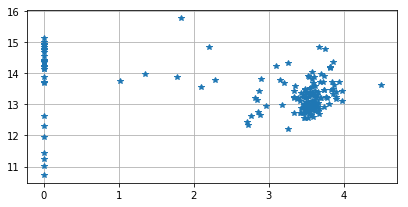

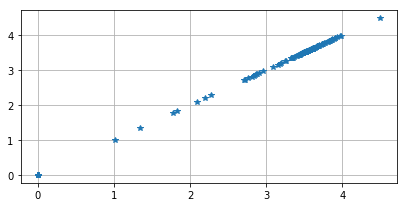

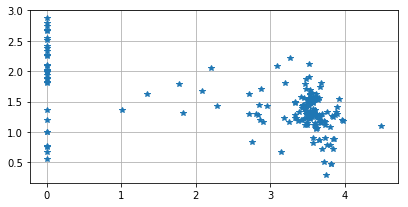

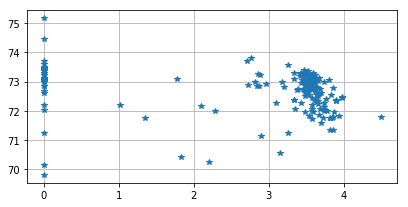

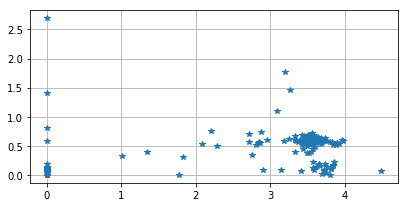

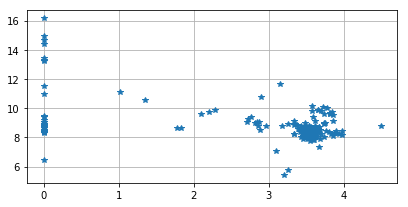

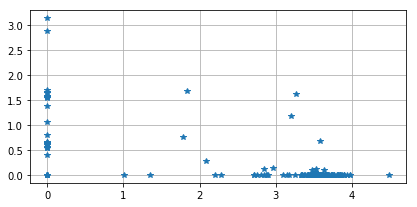

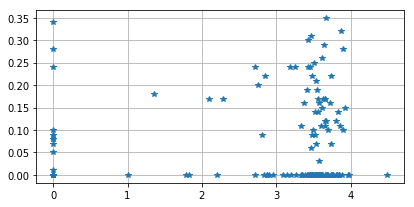

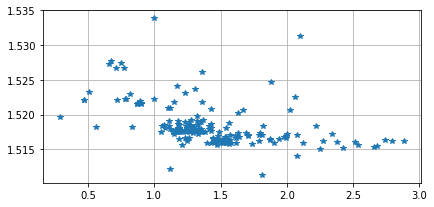

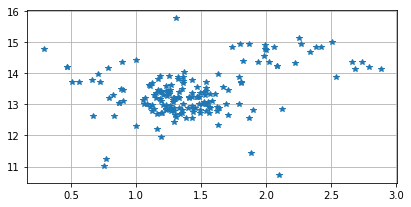

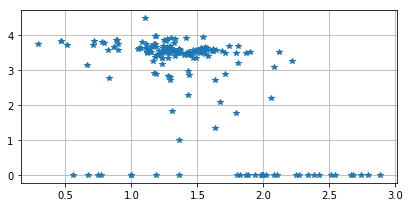

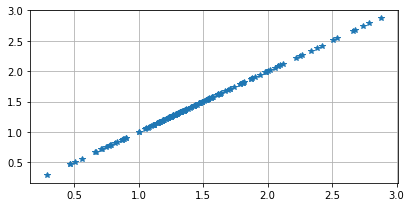

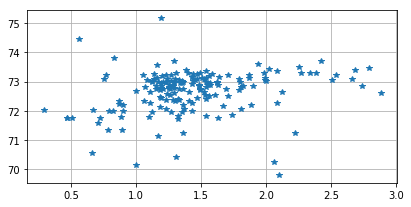

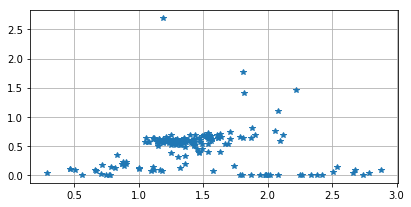

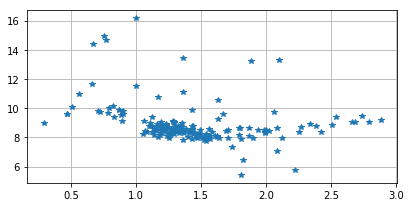

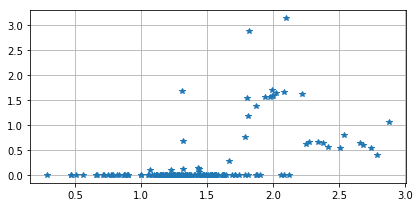

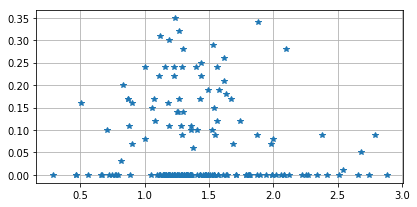

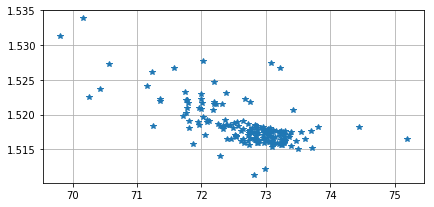

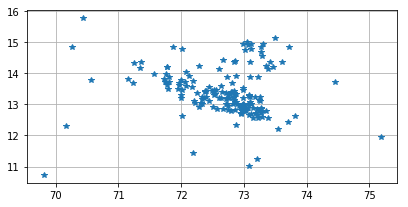

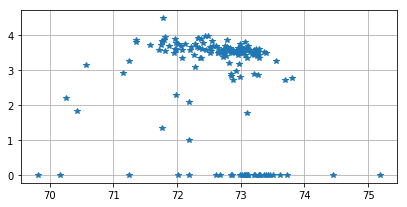

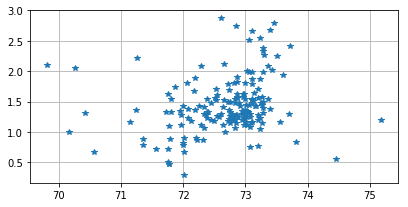

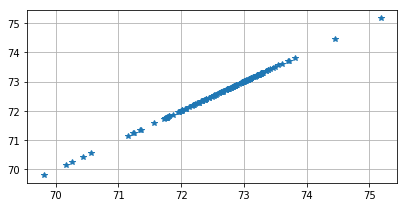

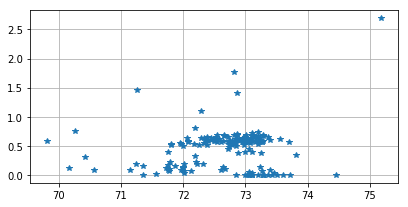

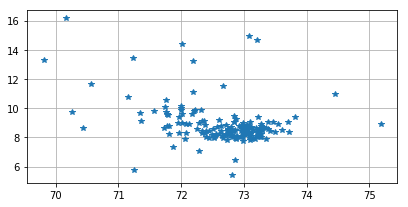

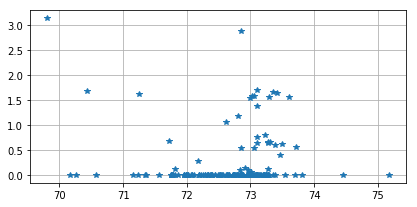

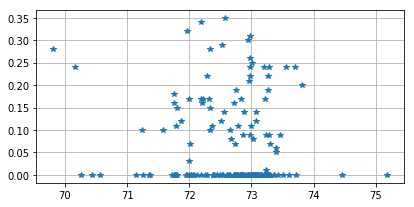

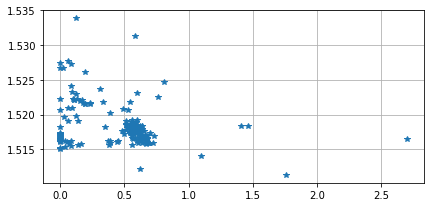

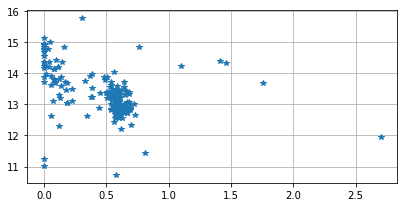

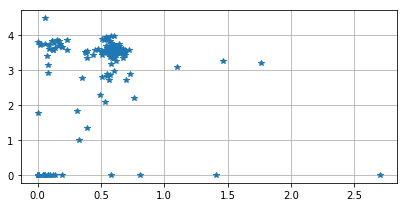

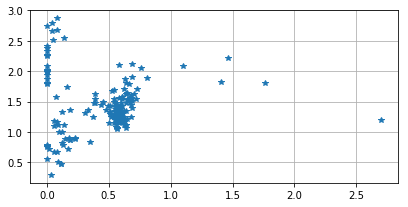

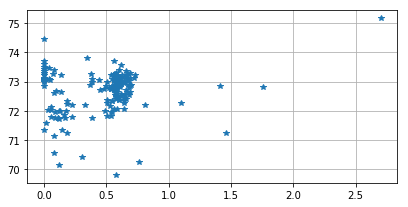

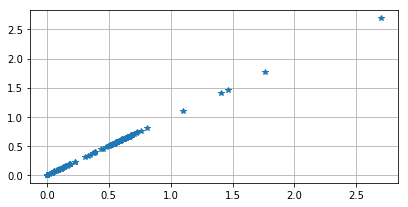

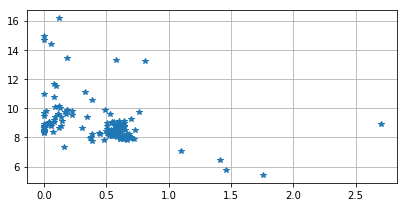

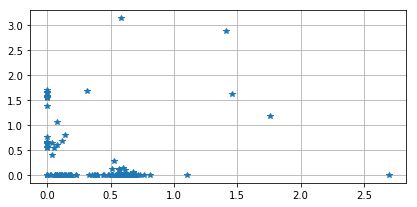

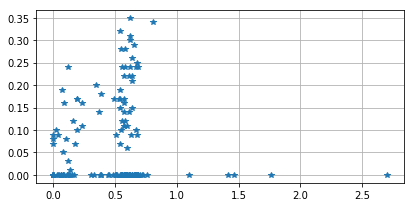

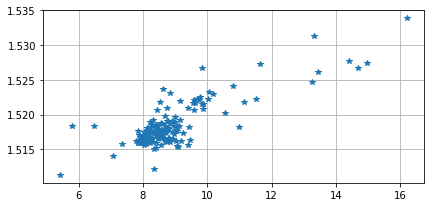

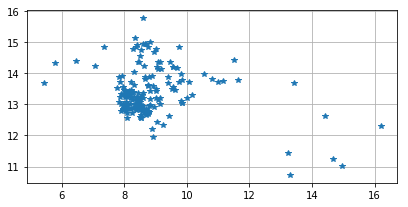

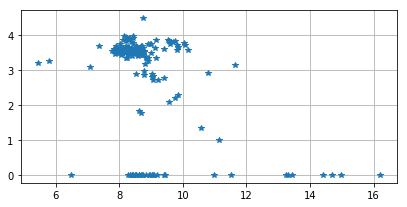

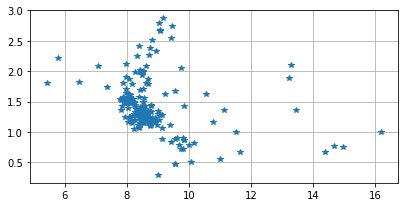

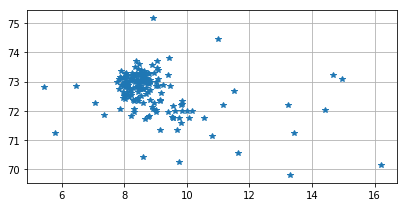

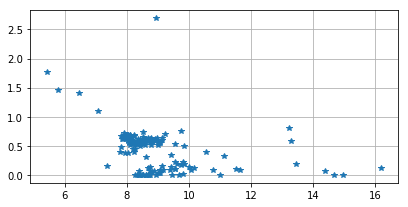

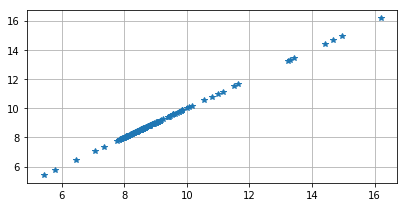

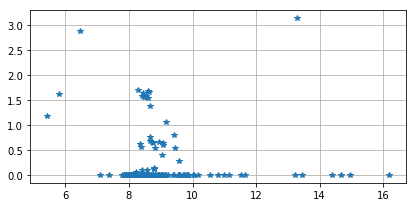

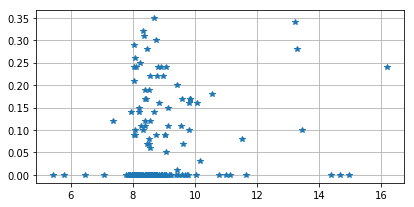

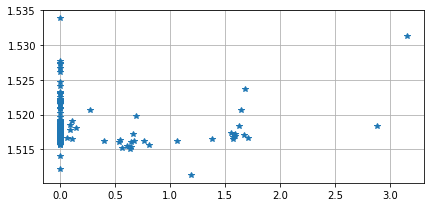

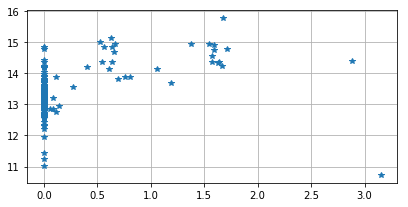

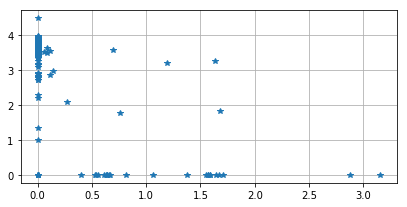

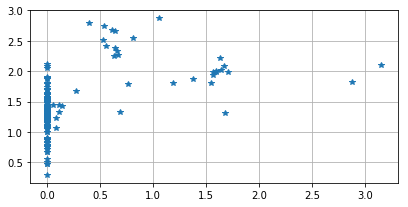

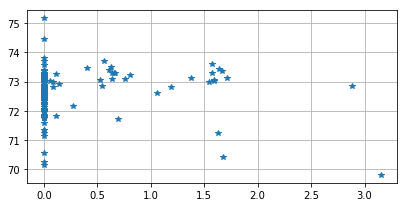

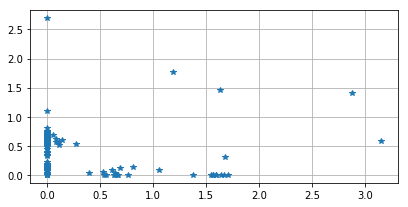

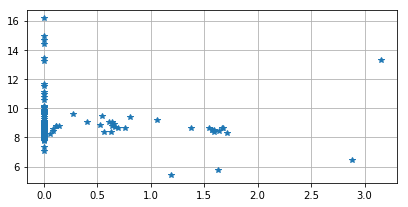

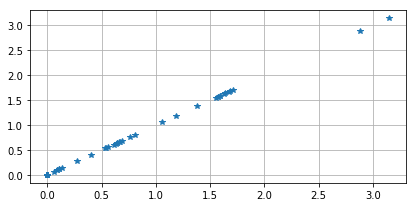

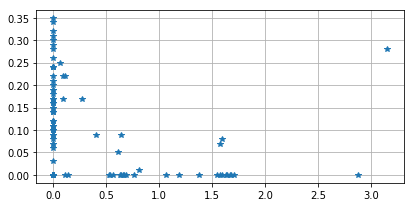

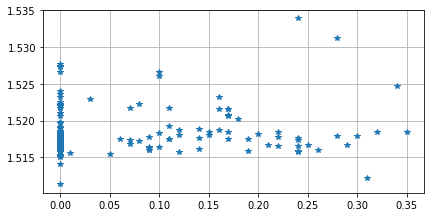

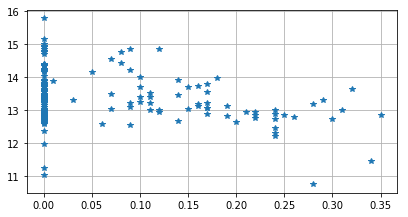

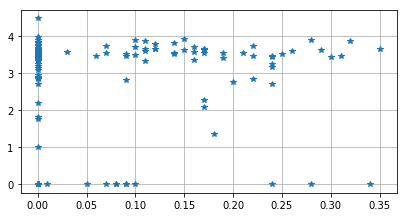

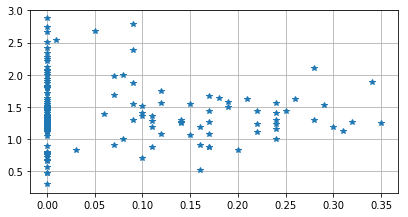

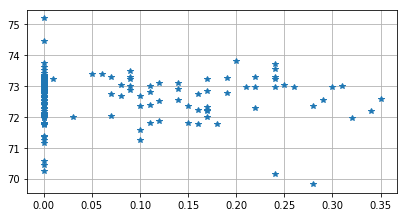

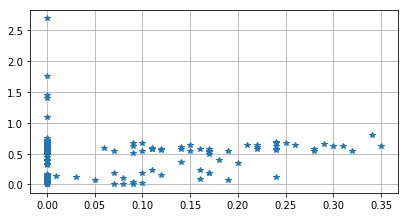

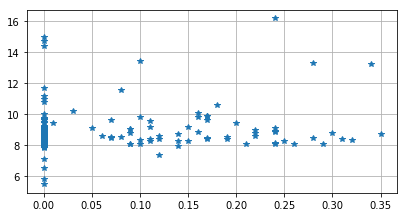

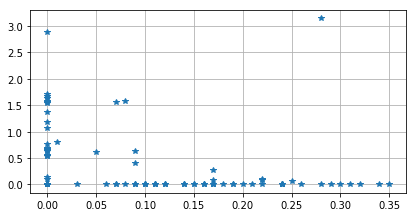

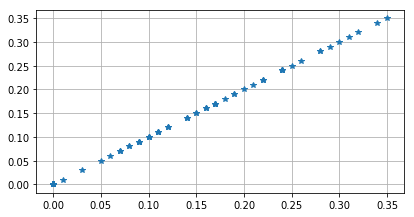

In [37]:
for i in range(9):
    for j in range(9):
        plt.figure(figsize=[50,25])
        plt.subplot(9,9,i*9+j+1)
        plt.plot(df[df.columns[i]],df[df.columns[j]],"*")
        plt.tight_layout()
        plt.grid(True)

# Q2 Obtain the correlation matrix to prove the correlation between all feature columns. On the basis of these values, drop columns which are not required

In [48]:
df.corr()
newdata=df.drop(['ri','Si','K','Ca','Fe'],axis=1)
newdata.head()

,Na,Mg,Al,Ba,glass
0,13.64,4.49,1.10,0.0,1
1,13.89,3.60,1.36,0.0,1
2,13.53,3.55,1.54,0.0,1
3,13.21,3.69,1.29,0.0,1
4,13.27,3.62,1.24,0.0,1


# Q3 Split the data set into training and testing data set. Use the train_test_split function to get a 80:20 split, using random_state 3.

In [47]:
x_train,x_test,y_train,y_test=train_test_split(newdata[['Na','Mg','Al','Ba']],newdata['glass'],\
                                               test_size=0.2,random_state=3)

# Q4 Use the SVM Classifier model to classify the data, and get predictions for test dataset.

In [42]:
SVCClassifier=SVC(kernel='linear',C=10,max_iter=150)
SVCModel=SVCClassifier.fit(x_train,y_train)
print(SVCModel.predict(x_test))
print(y_test.values)
actual=SVCModel.predict(x_test)

[2 2 2 2 1 1 2 7 2 2 2 7 2 1 2 2 1 2 7 2 2 1 2 2 1 1 1 1 2 1 2 2 1 7 2]
[2 2 2 1 1 2 2 7 2 2 1 7 2 1 2 1 1 2 7 1 2 1 1 2 1 1 1 1 2 2 1 1 1 7 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


# Q5 Obtain the confusion matrix of the output.

In [43]:
print(confusion_matrix(actual,y_test,labels=[1,2,7]))

[[ 9  2  0]
 [ 7 13  0]
 [ 0  0  4]]


# Q6 Get the classification result for the following values respectively.

In [44]:
print(classification_report(actual,y_test,target_names=['glass:1','glass:2','glass:7']))

              precision    recall  f1-score   support

     glass:1       0.56      0.82      0.67        11
     glass:2       0.87      0.65      0.74        20
     glass:7       1.00      1.00      1.00         4

    accuracy                           0.74        35
   macro avg       0.81      0.82      0.80        35
weighted avg       0.79      0.74      0.75        35



#  Q7 Perform KFold cross validation for k=3 to 6 for this dataset.

In [46]:
for i in range(3,7):
    scores= cross_val_score(SVCClassifier,newdata[['Na','Mg','Al','Ba']],newdata['glass'],cv=i)
    print(i)
    print('cross validated score ',scores)
    print('Accuracy: %0.2f (+/- %0.2f)'%(scores.mean(),scores.std()*2))
    print('-----------')

3
cross validated score  [0.7        0.65517241 0.71929825]
Accuracy: 0.69 (+/- 0.05)
-----------
4
cross validated score  [0.66666667 0.63636364 0.6744186  0.74418605]
Accuracy: 0.68 (+/- 0.08)
-----------
5
cross validated score  [0.58333333 0.57142857 0.51428571 0.65714286 0.76470588]
Accuracy: 0.62 (+/- 0.17)
-----------
6
cross validated score  [0.66666667 0.63333333 0.66666667 0.6        0.60714286 0.74074074]
Accuracy: 0.65 (+/- 0.09)
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\s